# **Game Trends**

Importing necessary import statments 

In [76]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from IPython.display import Latex,display
warnings.filterwarnings("ignore")

Reading the Data into a **Data Frame** using **Pandas**

In [77]:
df=pd.read_csv('/kaggle/input/video-game-sales/Video Games Sales.csv')
df

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,497,Skylanders: Spyro's Adventure,Wii,2011.0,Action,Activision,1.18,1.02,0.00,0.26,2.46,67.00
497,497,498,Madden NFL 13,X360,2012.0,Sports,Electronic Arts,2.18,0.08,0.00,0.19,2.45,68.00
498,498,499,Marvel: Ultimate Alliance,X360,2006.0,Role-Playing,Activision,2.26,0.01,0.00,0.19,2.45,82.09
499,499,500,Final Fantasy Tactics,PS,1997.0,Role-Playing,Square,0.93,0.12,1.34,0.06,2.45,92.00


Getting a breif idea about the data by checking all datypes if the features

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          501 non-null    int64  
 1   Rank           501 non-null    int64  
 2   Game Title     501 non-null    object 
 3   Platform       501 non-null    object 
 4   Year           496 non-null    float64
 5   Genre          501 non-null    object 
 6   Publisher      500 non-null    object 
 7   North America  501 non-null    float64
 8   Europe         501 non-null    float64
 9   Japan          501 non-null    float64
 10  Rest of World  501 non-null    float64
 11  Global         501 non-null    float64
 12  Review         501 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 51.0+ KB


In [79]:
df.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,501.000000,501.000000,496.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,250.000000,251.000000,2003.326613,2.788822,1.617246,0.736547,0.461377,5.603852,83.843234
std,144.770508,144.770508,6.309059,3.310535,1.921329,1.202469,0.582478,5.890696,8.339025
min,0.000000,1.000000,1983.000000,0.000000,0.000000,0.000000,0.000000,2.450000,39.000000
25%,125.000000,126.000000,2000.000000,1.450000,0.760000,0.020000,0.170000,2.990000,80.000000
50%,250.000000,251.000000,2005.000000,2.000000,1.200000,0.120000,0.330000,3.840000,86.000000
75%,375.000000,376.000000,2008.000000,2.970000,1.840000,0.960000,0.540000,5.470000,90.000000
max,500.000000,501.000000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


# Pre Processing

Dropping the unnecessary columns

In [80]:
df.drop(columns=['index','Rank'],inplace=True)
df

,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...
496,Skylanders: Spyro's Adventure,Wii,2011.0,Action,Activision,1.18,1.02,0.00,0.26,2.46,67.00
497,Madden NFL 13,X360,2012.0,Sports,Electronic Arts,2.18,0.08,0.00,0.19,2.45,68.00
498,Marvel: Ultimate Alliance,X360,2006.0,Role-Playing,Activision,2.26,0.01,0.00,0.19,2.45,82.09
499,Final Fantasy Tactics,PS,1997.0,Role-Playing,Square,0.93,0.12,1.34,0.06,2.45,92.00


In [81]:
df.isnull().sum()

Game Title       0
Platform         0
Year             5
Genre            0
Publisher        1
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

In [82]:
df['Year'].fillna(df['Year'].mode().iloc[0],inplace=True)
df.isnull().sum()

Game Title       0
Platform         0
Year             0
Genre            0
Publisher        1
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

In [83]:
df['Publisher'].fillna(df['Publisher'].mode().iloc[0],inplace=True)
df.isnull().sum()

Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

In [84]:
publisher_count = dict(df['Publisher'].value_counts().head(5))
top_publishers=list(publisher_count.keys())
platform_count = dict(df['Platform'].value_counts().head(5))
top_platforms=list(platform_count.keys())

In [85]:
df.loc[~df['Publisher'].isin(top_publishers), 'Publisher'] = 'Other'
df.loc[~df['Platform'].isin(top_platforms), 'Platform'] = 'Other'

# Analysis

In [86]:
df.sort_values(by='Global',ascending=False)

,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,Wii Sports,Other,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,Super Mario Bros.,Other,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,Mario Kart Wii,Other,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,Wii Sports Resort,Other,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,Tetris,Other,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...
496,Skylanders: Spyro's Adventure,Other,2011.0,Action,Activision,1.18,1.02,0.00,0.26,2.46,67.00
497,Madden NFL 13,X360,2012.0,Sports,Electronic Arts,2.18,0.08,0.00,0.19,2.45,68.00
498,Marvel: Ultimate Alliance,X360,2006.0,Role-Playing,Activision,2.26,0.01,0.00,0.19,2.45,82.09
499,Final Fantasy Tactics,PS,1997.0,Role-Playing,Other,0.93,0.12,1.34,0.06,2.45,92.00


**Ranks based on Global Sales:**
1. Wii Sports
2. Super Mario Bros
3. Mario Kart Wii

In [87]:
df.sort_values(by='Review',ascending=False)

,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
73,The Legend of Zelda: Ocarina of Time,Other,1998.0,Adventure,Nintendo,4.10,1.89,1.45,0.16,7.60,97.00
411,Metroid Prime,Other,2002.0,Shooter,Nintendo,1.96,0.67,0.10,0.09,2.82,96.35
78,Tekken 3,PS,1998.0,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16,96.30
461,BioShock,X360,2007.0,Shooter,Other,1.46,0.81,0.05,0.26,2.58,96.12
264,Batman: Arkham Asylum,PS3,2009.0,Action,Other,1.95,1.16,0.05,0.54,3.71,96.09
...,...,...,...,...,...,...,...,...,...,...,...
415,Imagine: Fashion Designer,DS,2007.0,Simulation,Ubisoft,1.31,1.18,0.00,0.30,2.79,56.00
417,A Bug's Life,PS,1998.0,Platform,Sony Computer Entertainment,1.96,0.72,0.00,0.11,2.79,51.90
99,Zumba Fitness,Other,2010.0,Sports,Other,3.21,2.44,0.00,0.66,6.30,51.00
449,Hannah Montana,DS,2006.0,Action,Other,1.59,0.80,0.00,0.26,2.64,45.00


**Ranks based on Review:**
1. The Legend of Zelda: Ocarina of Time
2. Metroid Prime
3. Tekken 3

In [88]:
df.drop(0,inplace=True)
df

,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
1,Super Mario Bros.,Other,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,Mario Kart Wii,Other,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,Wii Sports Resort,Other,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,Tetris,Other,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
5,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,10.85,8.87,6.48,2.88,29.08,90.00
...,...,...,...,...,...,...,...,...,...,...,...
496,Skylanders: Spyro's Adventure,Other,2011.0,Action,Activision,1.18,1.02,0.00,0.26,2.46,67.00
497,Madden NFL 13,X360,2012.0,Sports,Electronic Arts,2.18,0.08,0.00,0.19,2.45,68.00
498,Marvel: Ultimate Alliance,X360,2006.0,Role-Playing,Activision,2.26,0.01,0.00,0.19,2.45,82.09
499,Final Fantasy Tactics,PS,1997.0,Role-Playing,Other,0.93,0.12,1.34,0.06,2.45,92.00


# Using plots to Analyze the data

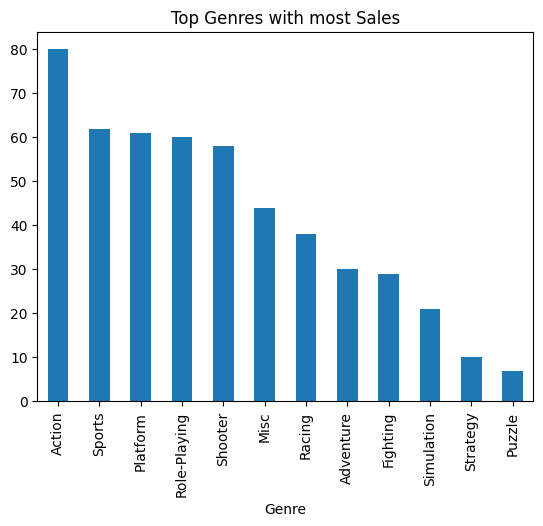

In [89]:
publisher_count = df['Genre'].value_counts().plot(kind='bar')
plt.title('Top Genres with most Sales')
plt.savefig("TopGenre.png")
plt.show()

In [90]:
top5_genre = ['Sports','Action','Shooter','Platform','Racing']

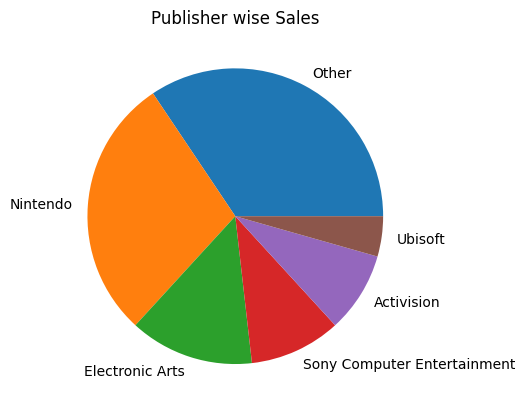

In [91]:
publisher_count = df['Publisher'].value_counts().head(15)
plt.pie(publisher_count.values, labels=publisher_count.index, )
plt.title('Publisher wise Sales')
plt.savefig("pie.png")
plt.show()

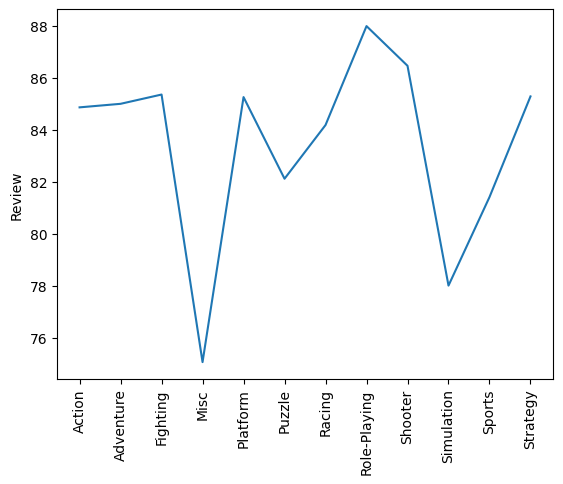

In [92]:
group=df.groupby('Genre')
mean_review=group['Review'].mean()
sns.lineplot(x=np.sort(df['Genre'].unique()),y=mean_review)
plt.xticks(rotation=90)
plt.savefig("Genre_review_line.png")
plt.show()

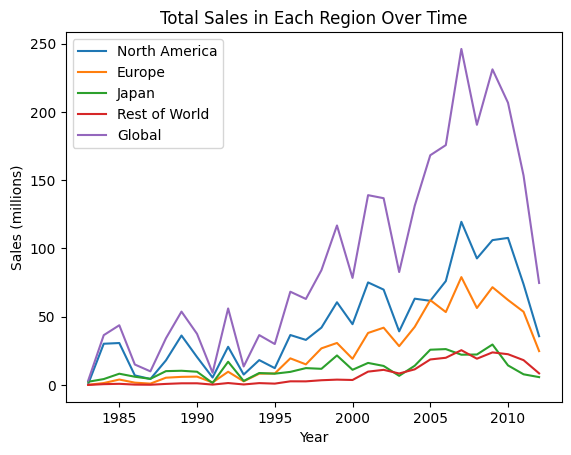

In [93]:
sales_by_year = df.groupby("Year").sum()[["North America", "Europe", "Japan", "Rest of World","Global"]]

plt.plot(sales_by_year.index, sales_by_year["North America"], label="North America")
plt.plot(sales_by_year.index, sales_by_year["Europe"], label="Europe")
plt.plot(sales_by_year.index, sales_by_year["Japan"], label="Japan")
plt.plot(sales_by_year.index, sales_by_year["Rest of World"], label="Rest of World")
plt.plot(sales_by_year.index, sales_by_year["Global"], label="Global")
plt.xlabel("Year")
plt.ylabel("Sales (millions)")
plt.title("Total Sales in Each Region Over Time")
plt.legend()
plt.savefig("YearVSsales.png")
plt.show()

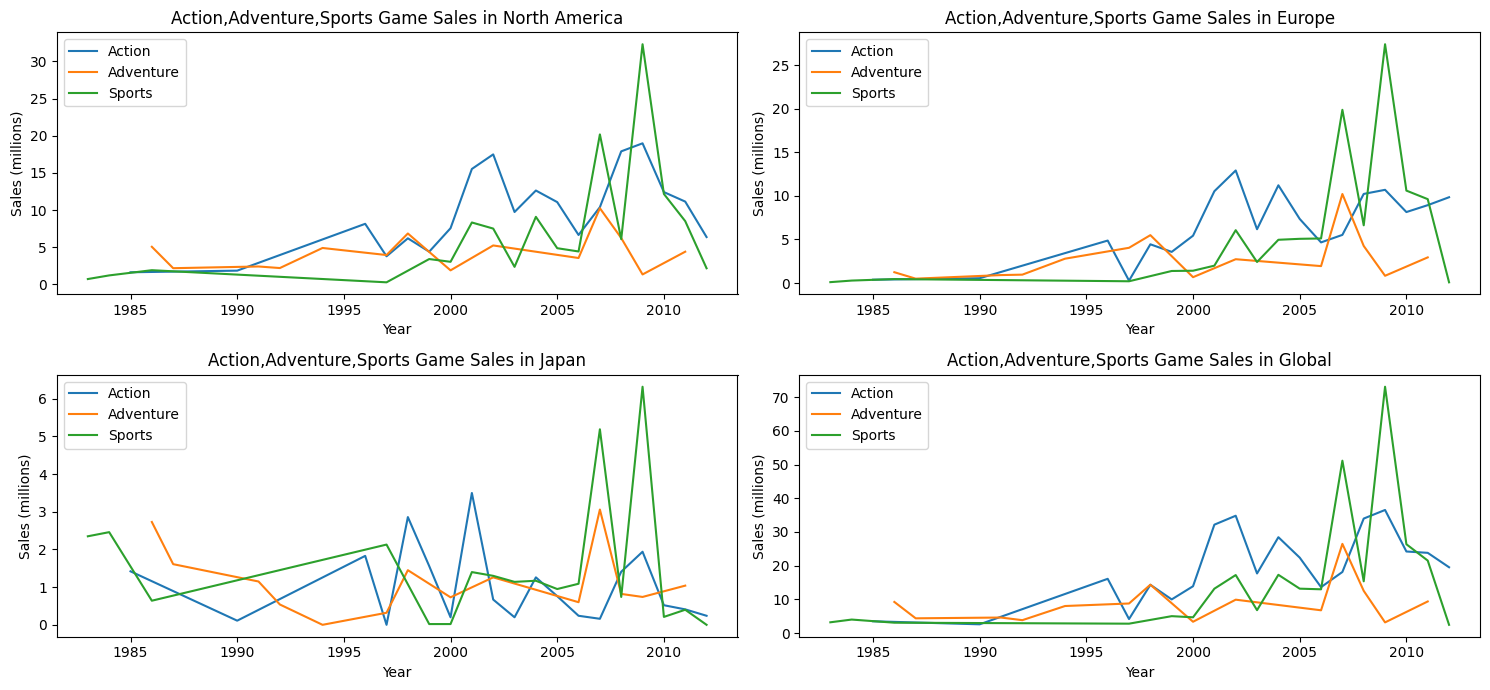

In [94]:
places=["North America", "Europe", "Japan","Global"]
sales_by_year_genre = df.groupby(["Year", "Genre"]).sum()[places]

action_sales = sales_by_year_genre.loc[sales_by_year_genre.index.get_level_values(1) == "Action"]
adventure_sales = sales_by_year_genre.loc[sales_by_year_genre.index.get_level_values(1) == "Adventure"]
sports_sales = sales_by_year_genre.loc[sales_by_year_genre.index.get_level_values(1) == "Sports"]
fig,axes=plt.subplots(2,2,figsize=(15,7))
axes=axes.flatten()
for i,place in enumerate(places):
    axes[i].plot(action_sales.index.get_level_values(0), action_sales[place], label="Action")
    axes[i].plot(adventure_sales.index.get_level_values(0), adventure_sales[place], label="Adventure")
    axes[i].plot(sports_sales.index.get_level_values(0), sports_sales[place], label="Sports")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Sales (millions)")
    axes[i].set_title(f"Action,Adventure,Sports Game Sales in {place}")
    axes[i].legend()
plt.savefig("AAS.png")
plt.tight_layout()

# Estimation

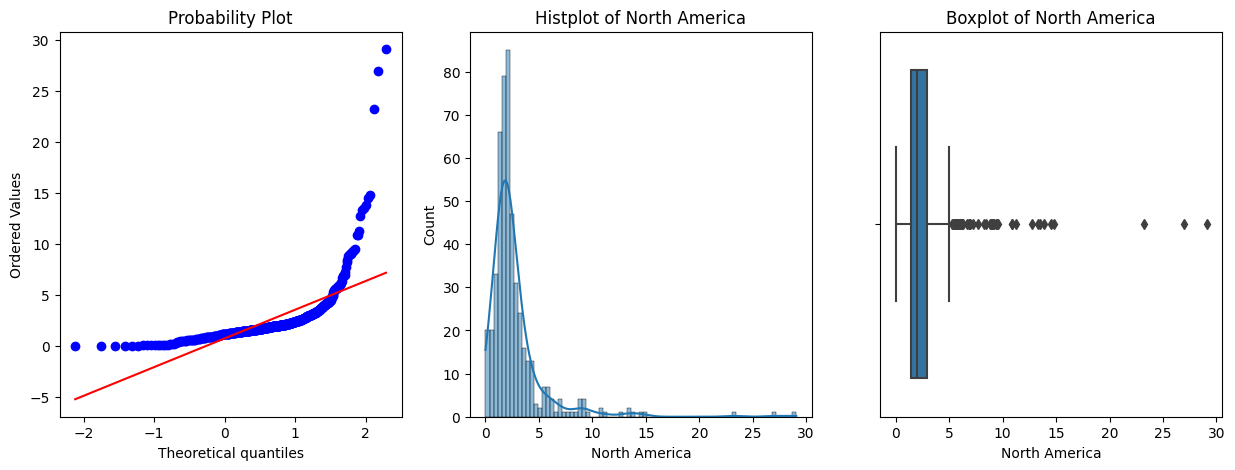

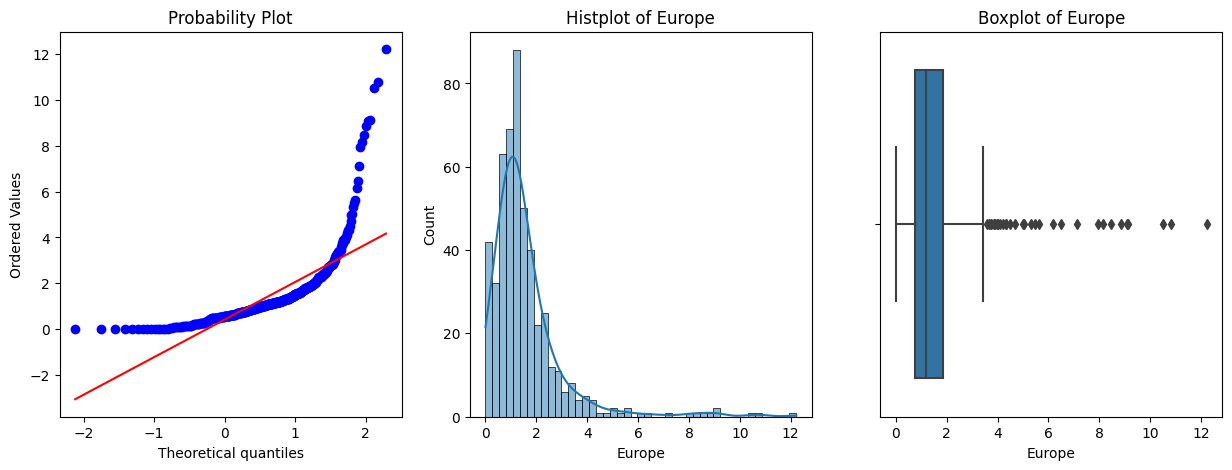

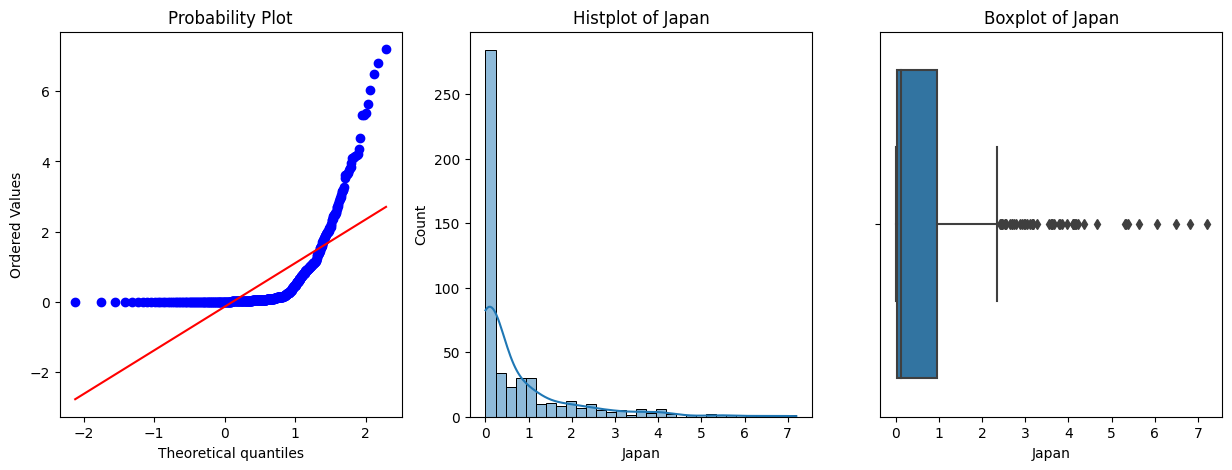

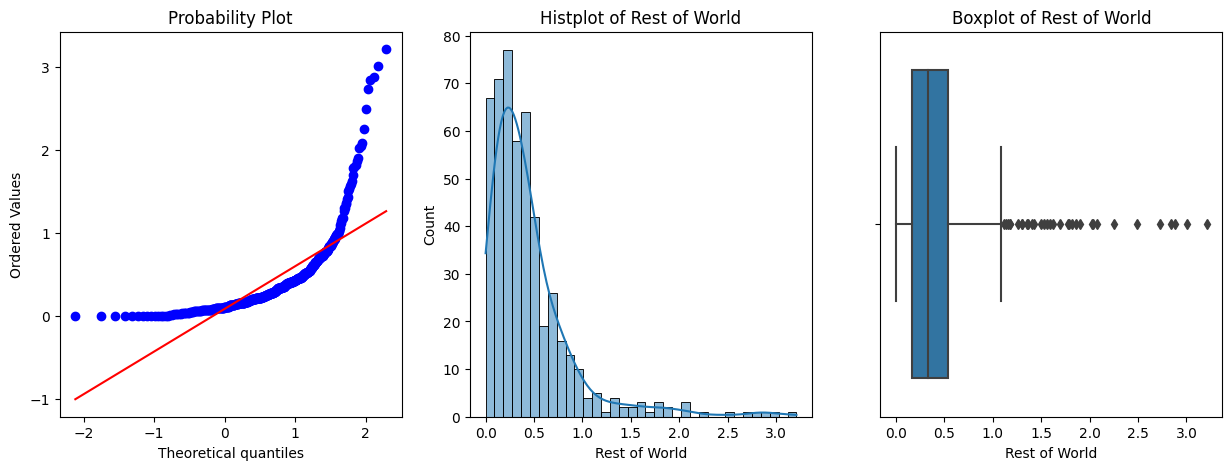

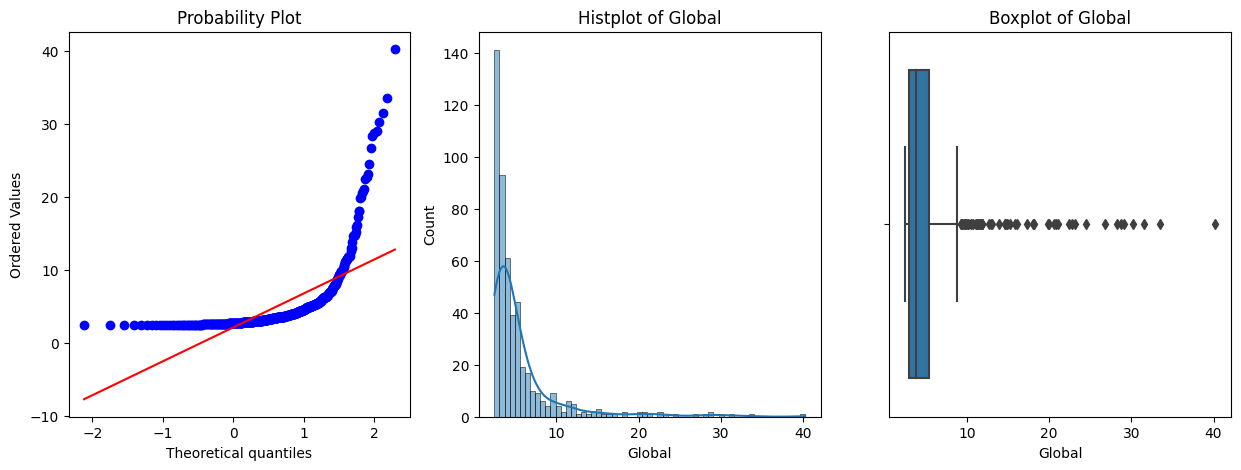

In [95]:
for col in numerical_cols:
    fig,ax=plt.subplots(1,3,figsize=(15,5))
    res=stats.probplot(df[col], dist=stats.loggamma, sparams=(2.5,), plot=ax[0])
    sns.histplot(df,x=col,ax=ax[1],kde=True)
    ax[1].set_title(f"Histplot of {col}")
    sns.boxplot(df,x=col,ax=ax[2])
    ax[2].set_title(f"Boxplot of {col}")
    plt.savefig(f"{col}Before.png")
    plt.show()

In [96]:
def normalize(col):
    y, lam = stats.boxcox(col)
    normalcol=(col**lam-1)/lam
    return normalcol,lam
global_sales,glam=normalize(df['Global'])
reviews,rlam=normalize(df['Review'])

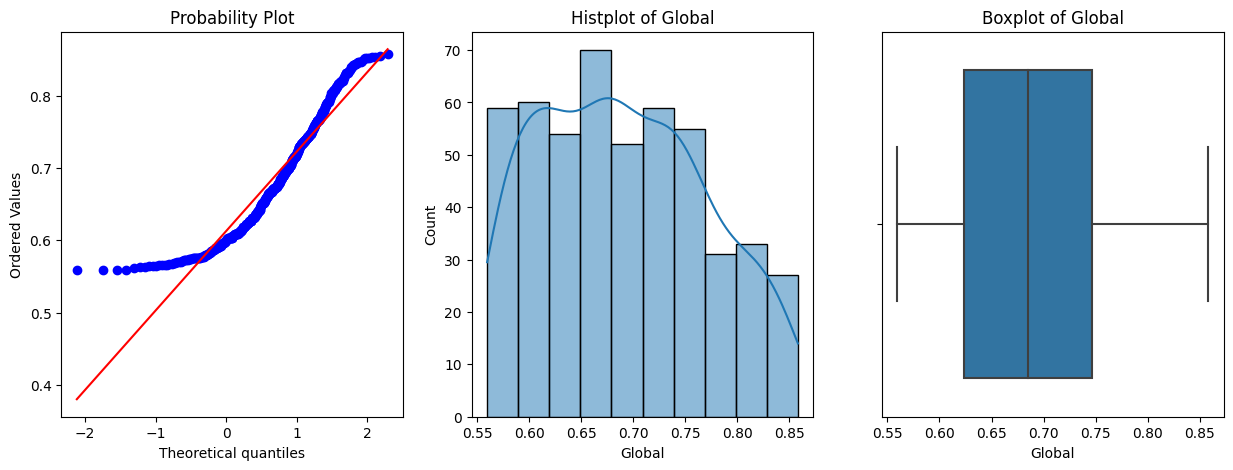

In [98]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
res=stats.probplot(global_sales, dist=stats.loggamma, sparams=(2.5,), plot=ax[0])
sns.histplot(x=global_sales,ax=ax[1],kde=True)
ax[1].set_title(f"Histplot of Global")
sns.boxplot(x=global_sales,ax=ax[2])
ax[2].set_title(f"Boxplot of Global")
plt.savefig("GlobalAfter.png")

plt.show()


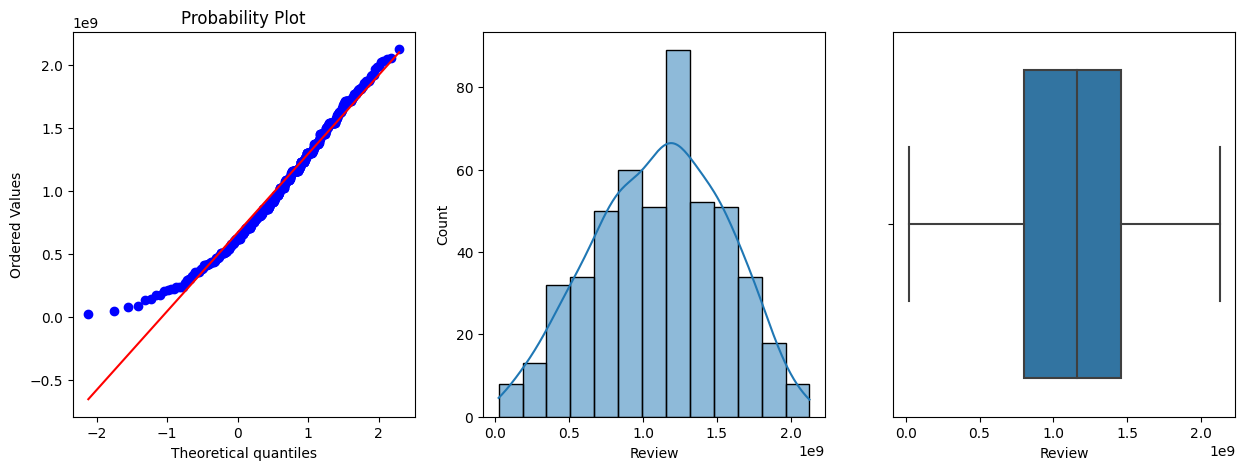

In [99]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
res=stats.probplot(reviews, dist=stats.loggamma, sparams=(2.5,), plot=ax[0])
sns.histplot(x=reviews,ax=ax[1],kde=True)
sns.boxplot(x=reviews,ax=ax[2])
plt.savefig("ReviewAfter.png")
plt.show()


In [100]:
df['Global'].skew(),global_sales.skew()

(3.54907364095025, 0.23595658899099217)

In [101]:
df['Review'].skew(),reviews.skew()

(-1.416157007162893, -0.14552028167732142)

$$H_0 : \mu = \mu_0$$
$$vs$$
$$H_1 : \mu \neq \mu_0$$

In [102]:
mu0=4
alpha=0.05
mu0=(mu0**glam-1)/glam
mean=global_sales.mean()
var=global_sales.var(ddof=1)
n=len(global_sales)
Zcal=(mean-mu0)/(np.sqrt(var/n))
p=2*(1-stats.norm.cdf(abs(Zcal)))

In [103]:
print('Zcal \t:',Zcal,'\np \t:',p)
print()
display(Latex(f'$Reject\ H_0$')) if p<alpha else display(Latex(f'$Do\ not\ reject\ H_0$'))

Zcal 	: -0.9669183296980897 
p 	: 0.33358486272284127



<IPython.core.display.Latex object>

In [104]:
mean=reviews.mean()
mean

1111654504.0033915

In [105]:
mu0=83
alpha=0.05
mu0=(mu0**rlam-1)/rlam
mean=reviews.mean()
var=reviews.var(ddof=1)
n=len(reviews)
Zcal=(mean-mu0)/(np.sqrt(var/n))
p=2*(1-stats.norm.cdf(abs(Zcal)))

In [106]:
print('Zcal \t:',Zcal,'\np \t:',p)
print()
display(Latex(f'$Reject\ H_0$')) if p<alpha else display(Latex(f'$Do\ not\ reject\ H_0$'))

Zcal 	: 7.260169260169072 
p 	: 3.865796571744795e-13



<IPython.core.display.Latex object>